In [1]:
# Load required libraries
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set working directory
os.chdir("E:\project")

In [3]:
# Load the data
loan_data = pd.read_csv("bank-loan.csv")

In [4]:
# tells unique value count in each variable
for feature in loan_data.columns:
    print(feature ,':', loan_data[feature].nunique())

age : 37
ed : 5
employ : 33
address : 32
income : 129
debtinc : 245
creddebt : 842
othdebt : 848
default : 2


In [5]:
# Convert data to required data types
loan_data['ed'] = loan_data['ed'].astype('category')
loan_data['default'] = loan_data['default'].astype('category')

In [6]:
# Dividing the train and test data-set.
# here train set will be used to bulid and test the Model
# The Model will be used to predict the value of target column in the test set
train = pd.DataFrame(loan_data.loc[pd.notnull(loan_data['default'])])
test = pd.DataFrame(loan_data.loc[pd.isnull(loan_data['default'])])
# removing default variable from test
test = test.drop([test.columns[-1]], axis=1)

In [7]:
# Saving Numerical and categorical variables in different list
num_var = train.select_dtypes([np.number]).columns
cat_var = train.select_dtypes(['category']).columns

# Exploratory Data Analysis

In [8]:
# taking a look at the data
# gives first five rows of data set
train.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [9]:
test.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
700,36,1,16,13,32,10.9,0.544128,2.943872
701,50,1,6,27,21,12.9,1.316574,1.392426
702,40,1,9,9,33,17.0,4.880700,0.729300
703,31,1,5,7,23,2.0,0.046000,0.414000
704,29,1,4,0,24,7.8,0.866736,1.005264


In [10]:
# Getting the number of variables and obervation in the train data-set
train.shape

(700, 9)

In [11]:
#checking types
train.dtypes

age            int64
ed          category
employ         int64
address        int64
income         int64
debtinc      float64
creddebt     float64
othdebt      float64
default     category
dtype: object

In [12]:
# Getting further info about the train data-set
# data type of data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 9 columns):
age         700 non-null int64
ed          700 non-null category
employ      700 non-null int64
address     700 non-null int64
income      700 non-null int64
debtinc     700 non-null float64
creddebt    700 non-null float64
othdebt     700 non-null float64
default     700 non-null category
dtypes: category(2), float64(3), int64(4)
memory usage: 45.4 KB


In [13]:
# getting summary of the train data-set
train.describe()

,age,employ,address,income,debtinc,creddebt,othdebt
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209
std,7.997342,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555
min,20.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584
25%,29.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178
50%,34.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567
75%,40.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065
max,56.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600


In [14]:
# Getting the number of variables and obervation in the test data-set
test.shape

(150, 8)

In [15]:
#checking types
test.dtypes

age            int64
ed          category
employ         int64
address        int64
income         int64
debtinc      float64
creddebt     float64
othdebt      float64
dtype: object

In [16]:
# Getting the info about the test data-set
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 700 to 849
Data columns (total 8 columns):
age         150 non-null int64
ed          150 non-null category
employ      150 non-null int64
address     150 non-null int64
income      150 non-null int64
debtinc     150 non-null float64
creddebt    150 non-null float64
othdebt     150 non-null float64
dtypes: category(1), float64(3), int64(4)
memory usage: 9.7 KB


In [17]:
# getting summary of test data-set
test.describe()

,age,employ,address,income,debtinc,creddebt,othdebt
count,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,35.82000,9.393333,8.806667,51.686667,9.756667,1.685314,3.174833
std,8.22508,7.277710,7.221051,45.563310,6.196215,2.169602,3.886865
min,21.00000,0.000000,0.000000,13.000000,0.100000,0.022050,0.052950
25%,29.25000,4.000000,3.000000,25.250000,5.400000,0.533265,1.085211
50%,35.00000,8.000000,7.000000,39.000000,8.900000,1.013213,2.111303
75%,43.00000,13.750000,12.000000,61.750000,12.900000,1.898235,3.850151
max,56.00000,33.000000,30.000000,324.000000,32.500000,13.552500,35.197500


In [18]:
# Unique values in a column
train[train.columns[-1]].unique()

[1.0, 0.0]
Categories (2, float64): [1.0, 0.0]

In [19]:
# Count of unique values in a column
train[train.columns[-1]].nunique()

2

In [20]:
train[train.columns[-1]].value_counts()
# we have 517 '0' values and 183 '1' values
# we can see that the data is unbalanced

0.0    517
1.0    183
Name: default, dtype: int64

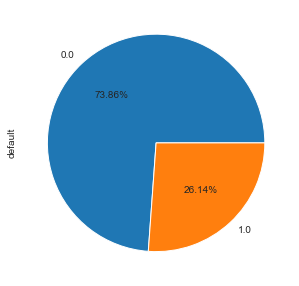

In [21]:
# setting grid for all charts
sns.set_style('darkgrid')
# visualizing target variable
plt.figure(figsize=(5,5))
train[train.columns[-1]].value_counts().plot.pie(autopct='%1.2f%%')

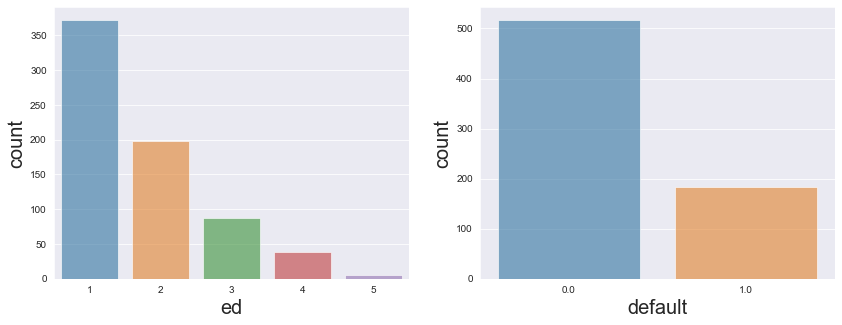

In [22]:
# categorical variable of train data set
plt.figure(figsize=(14,5))
for i,col in enumerate(cat_var):
    plt.subplot(1,2,i+1)
    sns.countplot(train[col], alpha=0.6)  
    plt.xlabel(col,fontsize=20)
    plt.ylabel('count',fontsize=20)

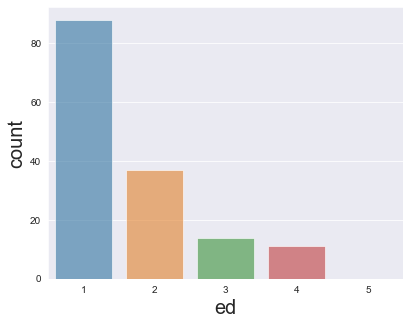

In [23]:
# categorical variable of test data set
plt.figure(figsize=(14,5))
for i,col in enumerate(cat_var[0:-1]):
    plt.subplot(1,2,i+1)
    sns.countplot(test[col], alpha=0.6)
    plt.xlabel(col,fontsize=20)
    plt.ylabel('count',fontsize=20)

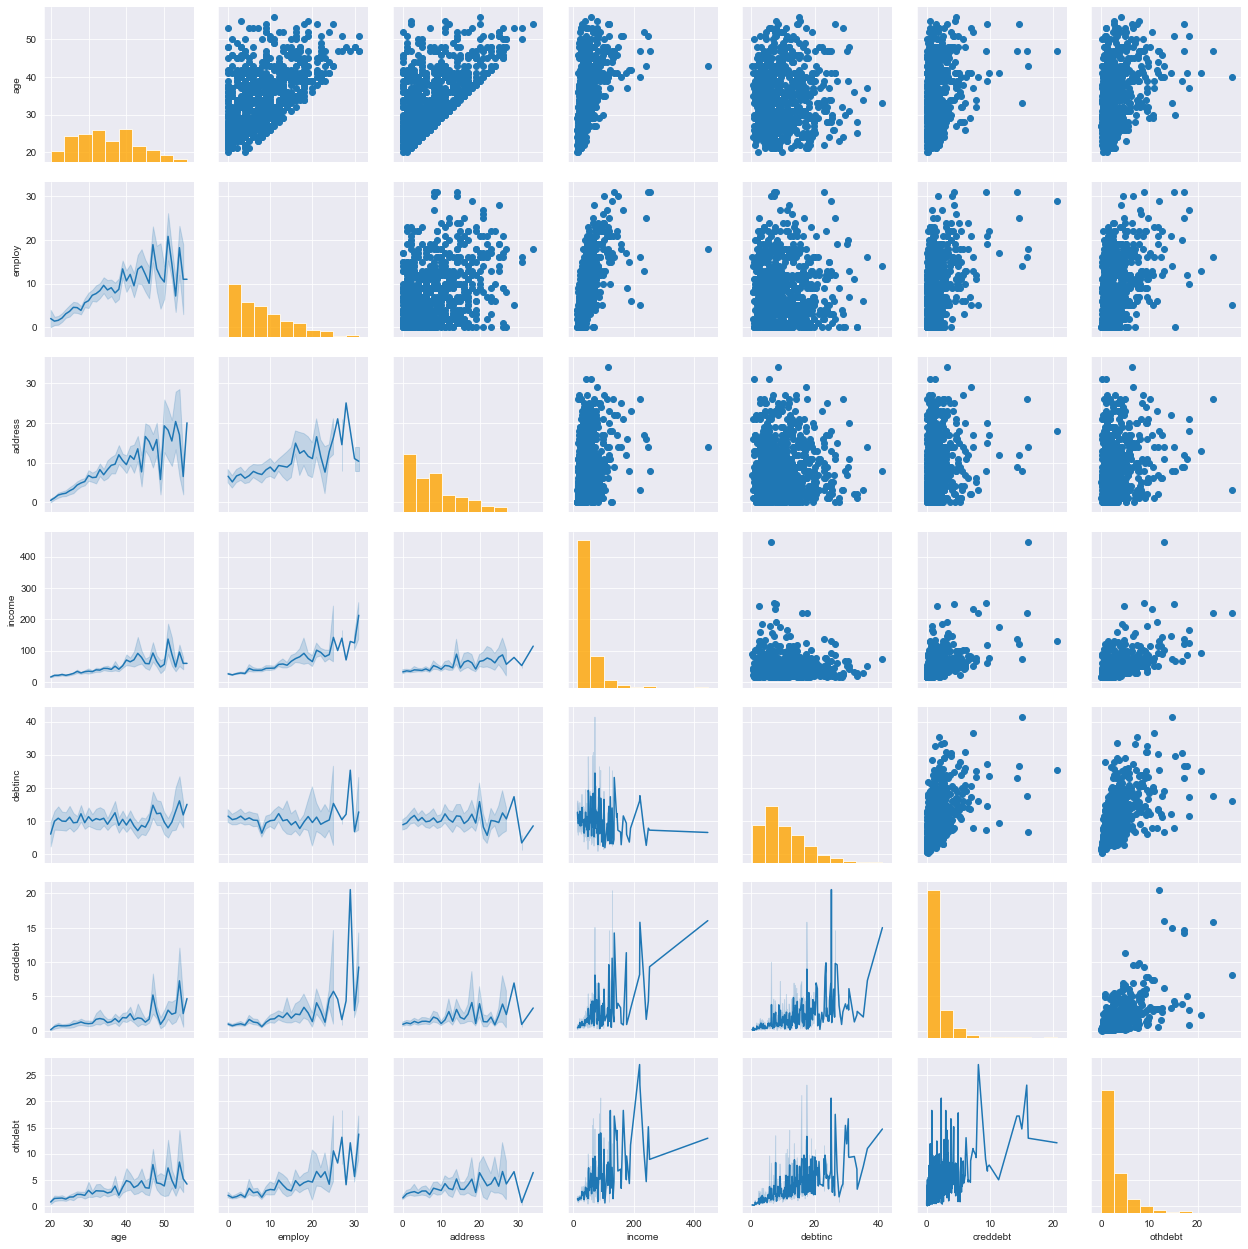

In [24]:
# Scatter plot
g = sns.PairGrid(train[train.select_dtypes([np.number]).columns])
g.map_diag(plt.hist, color='orange', alpha=0.8)
g.map_upper(plt.scatter)
g.map_lower(sns.lineplot)

Boxplot of Train features


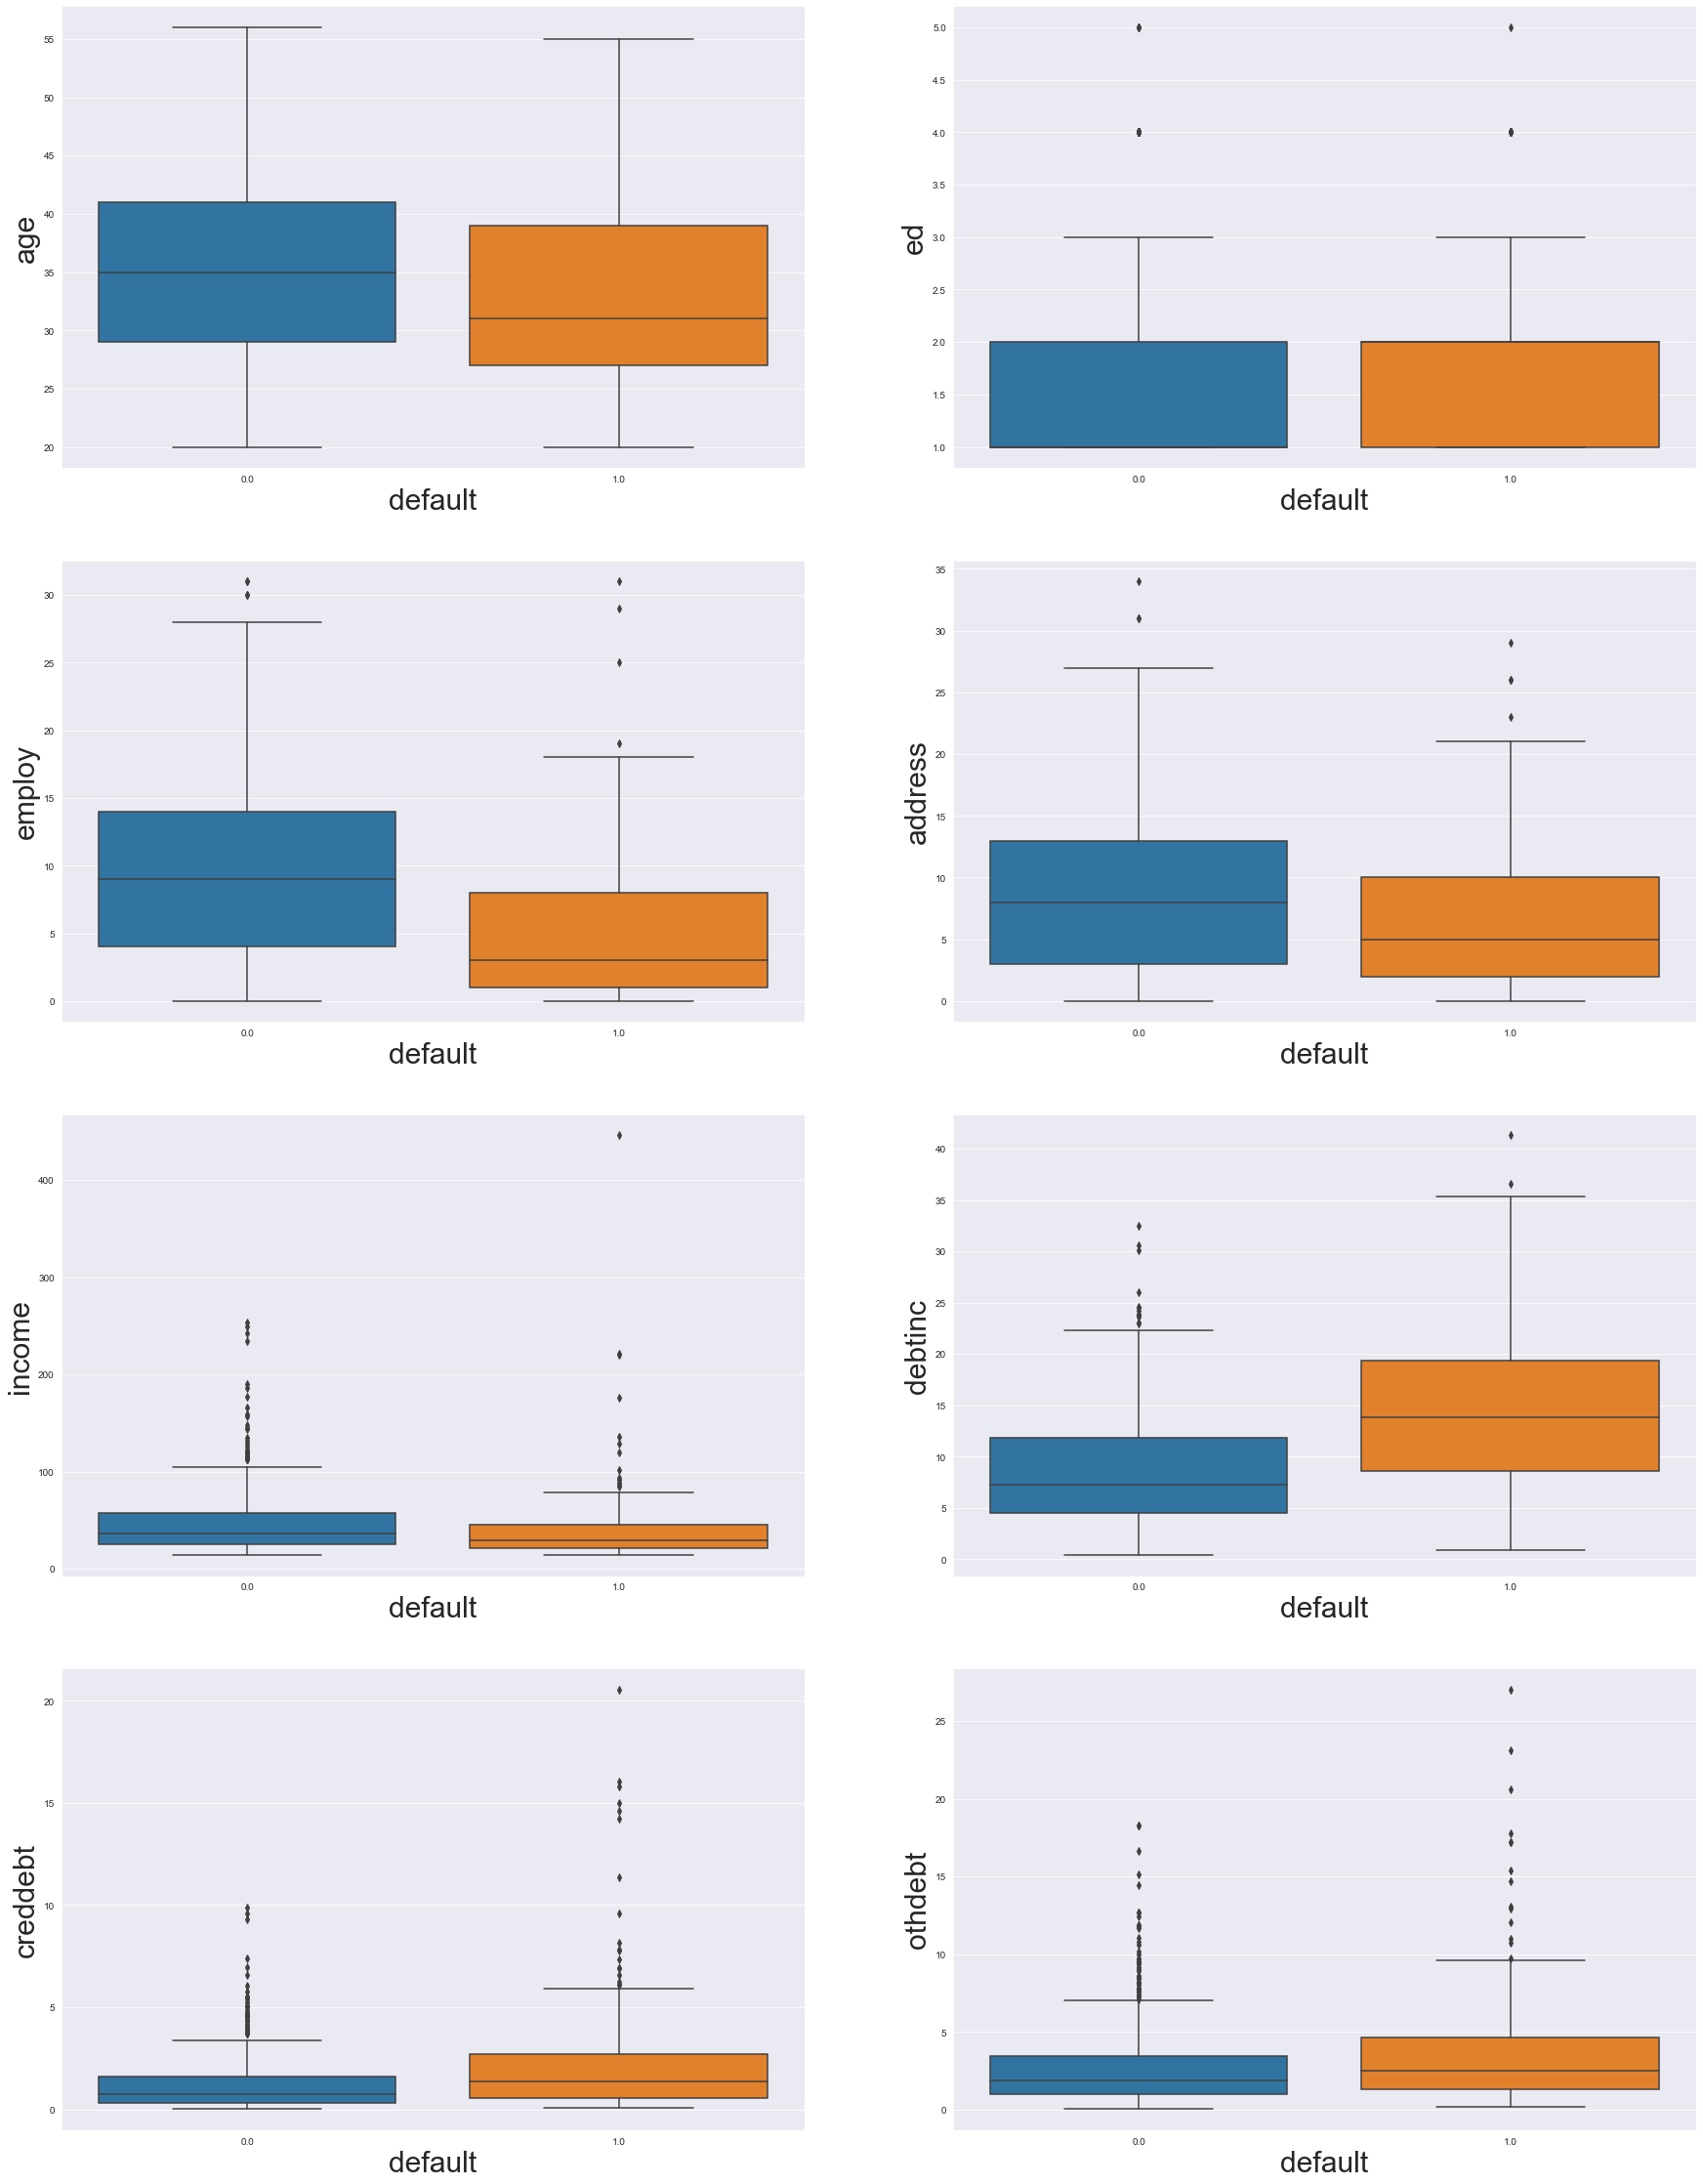

In [25]:
# draw boxplot of numeric data in Train set 
print("Boxplot of Train features")
plt.figure(figsize=(30,40))
for i,col in enumerate(train.columns.values[0:-1]):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=train.columns[-1], y=col, data=train, orient='v')
    plt.xlabel(train.columns[-1],fontsize=30)
    plt.ylabel(col,fontsize=30)
# from plots we can clearly see that there are outliers in our dataset

# Missing Value Analysis

In [26]:
# getting count of missing values in train
train.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [27]:
# getting count of missing values in test
test.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
dtype: int64

# Outlier Analysis

In [28]:
# checking outliers using Chauvenet's criterion
from scipy.special import erfc

def chauvenet(array):
    mean = array.mean()           # Mean of incoming array
    stdv = array.std()            # Standard deviation
    N = len(array)                # Lenght of incoming array
    criterion = 1.0/(2*N)         # Chauvenet's criterion
    d = abs(array-mean)/stdv      # Distance of a value to mean in stdv's
    prob = erfc(d)                # Area normal dist.    
    return prob < criterion       # Use boolean array outside this function

Text(0.5, 0, 'Number of outliers')

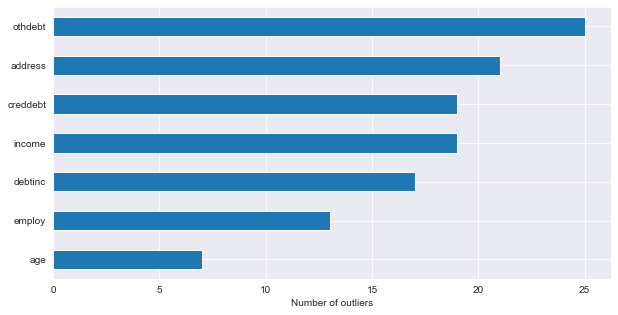

In [29]:
# outliers in each variable in train data 
train_outliers = dict()
for feature in num_var:
    train_outliers[feature] = train[chauvenet(train[feature].values)].shape[0]
train_outliers = pd.Series(train_outliers)

train_outliers.sort_values().plot(figsize=(10, 5), kind='barh').set_xlabel('Number of outliers')

In [30]:
print('Total number of outliers in training set: {} ({:.2f}%)'.format(sum(train_outliers.values),
                                                                      (sum(train_outliers.values) / train.shape[0]) * 100))

Total number of outliers in training set: 121 (17.29%)


Text(0.5, 0, 'Number of outliers')

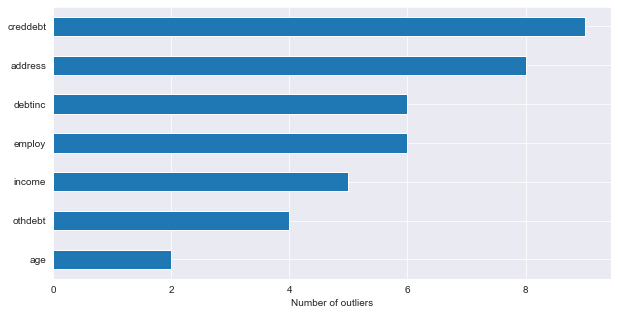

In [31]:
# outliers in each variable in test data

test_outliers = dict()
for feature in num_var:
    test_outliers[feature] = test[chauvenet(test[feature].values)].shape[0]
test_outliers = pd.Series(test_outliers)

test_outliers.sort_values().plot(figsize=(10, 5), kind='barh').set_xlabel('Number of outliers')

In [32]:
print('Total number of outliers in testing set: {} ({:.2f}%)'.format(sum(test_outliers.values),
                                                                     (sum(test_outliers.values) / test.shape[0]) * 100))

Total number of outliers in testing set: 40 (26.67%)


In [33]:
# for feature in num_var:
#     # to remove row from data-set
#     #train=train.loc[(~chauvenet(train[col].values))]
#     # to impute value in place of outlier
#     train.loc[(chauvenet(train[feature].values)), feature] = np.nan
    
#     #Impute with mean
#     #train[column_name] = train[column_name].fillna(train[column_name].mean())
#     #Impute with median
#     train[feature] = train[feature].fillna(train[feature].median())

# for feature in num_var:
#     # to remove row from data-set
#     #test=test.loc[(~chauvenet(test[col].values))]
#     # to impute value in place of outlier
#     test.loc[(chauvenet(test[feature].values)), feature] = np.nan
    
#     #Impute with mean
#     #test[feature] = test[feature].fillna(test[feature].mean())
#     #Impute with median
#     test[feature] = test[feature].fillna(test[feature].median())

# Feature Selection

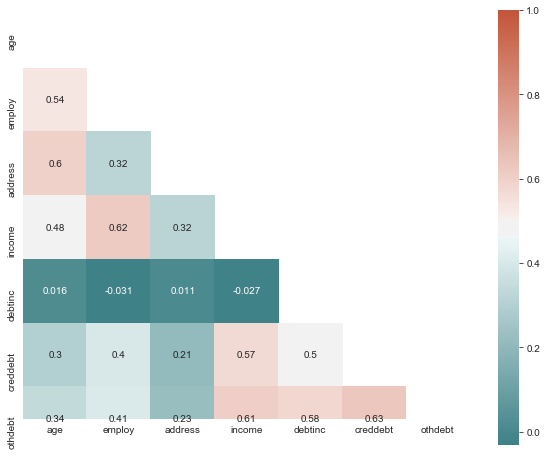

In [34]:
# Correlation plot
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(200, 20, as_cmap=True), square=True, annot=True)

In [35]:
np.fill_diagonal(corr.values,np.nan)
corr.max().max(),corr.min().min()

(0.6331036101558932, -0.03118221466537934)

In [36]:
# Chisquare test of independence
from scipy.stats import chi2_contingency
# loop for chi square values
for i in cat_var:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(train[cat_var[-1]], train[i]))
    print(p)
# replace variables whose p-value is more than 0.05

ed
0.02155395852574417
default
3.979757656840162e-153


In [37]:
# creating dummyvariables for categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
train = pd.DataFrame(ct.fit_transform(train))
test = pd.DataFrame(ct.fit_transform(test))

In [38]:
test.insert(4, 'col', 0)
test.columns = range(test.shape[1])

In [39]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,1,0,0,41,17,12,176,9.3,11.3594,5.00861,1
1,1,0,0,0,0,27,10,6,31,17.3,1.3622,4.0008,0
2,1,0,0,0,0,40,15,14,55,5.5,0.856075,2.16893,0
3,1,0,0,0,0,41,15,14,120,2.9,2.65872,0.82128,0
4,0,1,0,0,0,24,2,0,28,17.3,1.78744,3.05656,1


In [40]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0,36.0,16.0,13.0,32.0,10.9,0.544128,2.943872
1,1.0,0.0,0.0,0.0,0,50.0,6.0,27.0,21.0,12.9,1.316574,1.392426
2,1.0,0.0,0.0,0.0,0,40.0,9.0,9.0,33.0,17.0,4.880700,0.729300
3,1.0,0.0,0.0,0.0,0,31.0,5.0,7.0,23.0,2.0,0.046000,0.414000
4,1.0,0.0,0.0,0.0,0,29.0,4.0,0.0,24.0,7.8,0.866736,1.005264


In [41]:
# saving dependent and independent variable in different array

train = train.astype(np.integer)
test = test.astype(np.integer)

X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
test_result = test.iloc[:, 0:200].values

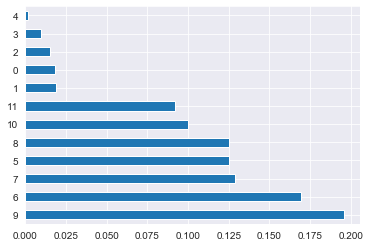

(700, 7)
(150, 7)


In [42]:
# Tree-based feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

etc_model = ExtraTreesClassifier().fit(X,y)

# plot graph of feature importances for better visualization
feat_importances = pd.Series(etc_model.feature_importances_, index=train.columns.values[0:-1])
feat_importances.nlargest((train.shape[1] - 1)).plot(kind='barh')
plt.show()

# selecting features using ExtraTreesClassifier
etc_model = SelectFromModel(etc_model, prefit=True)
X_etc = etc_model.transform(X)
test_etc = etc_model.transform(test)
print(X_etc.shape)
print(test_etc.shape)

In [43]:
# Select features on the base of model

X = X_etc
test_result = test_etc

# Sampling

In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Scaling

In [45]:
# another method of scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test_result = sc.transform(test_result)

##  Building the ANN

In [46]:
tf.random.set_seed(42)
# Initializing the ANN
ann = tf.keras.models.Sequential()

In [47]:
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [48]:
# Adding the second hidden layer
#ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [49]:
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

In [50]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [51]:
# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 100, epochs = 100)

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8813 - accuracy: 0.3625
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8648 - accuracy: 0.3714
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8479 - accuracy: 0.3839
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8325 - accuracy: 0.3875
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8171 - accuracy: 0.3893
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8028 - accuracy: 0.3964
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7886 - accuracy: 0.4089
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7749 - accuracy: 0.4268
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7621 - accuracy: 0.4321
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7496 - accuracy: 0.4429
Epoch 11/100
6/6 [===========

## Predicting the Test set results

In [52]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

[[98  4]
 [15 23]]
Accuracy is: 0.8643
FNR is: 39.474
Precision is: 0.8519
Recall is: 0.6053
F1 Score is: 0.7077


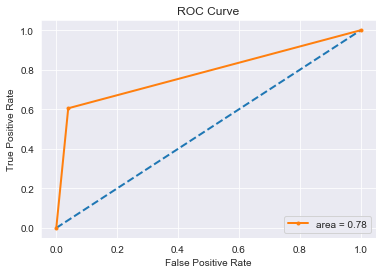

In [53]:
# libraries to make pr and roc curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# let us save TP, TN, FP, FN
TN = cm[0,0]
FN = cm[1,0]
TP = cm[1,1]
FP = cm[0,1]

accuracy = accuracy_score(y_test, y_pred)
FNR = (FN*100)/(FN+TP)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)

print(cm)
print('Accuracy is: %0.4f' %accuracy)
print('FNR is: %0.3f' %FNR)
print('Precision is: %0.4f' %precision)
print('Recall is: %0.4f' %recall)
print('F1 Score is: %0.4f' %f1_score)

# Receiver Operating Characteristic
# plot model roc curve 
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.plot(fpr, tpr, marker='.', lw=2, label='area = %0.2f' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Predicting Test data-set and saving output file

In [54]:
test_pred = ann.predict(test_result)
test_pred = (test_pred > 0.5)

test['default'] = test_pred
# Writing a csv (output)
#test_output.to_csv("test_output_ann_python.csv", index = False)

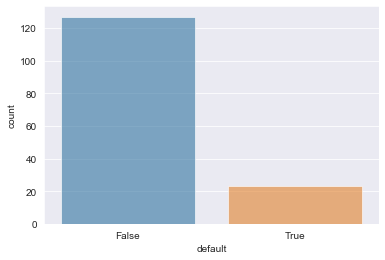

In [55]:
# visualizing output target variable
sns.countplot(test[test.columns[-1]], alpha=0.6)

In [56]:
test[test.columns[-1]].value_counts()

False    127
True      23
Name: default, dtype: int64

In [57]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,default
0,1,0,0,0,0,36,16,13,32,10,0,2,False
1,1,0,0,0,0,50,6,27,21,12,1,1,False
2,1,0,0,0,0,40,9,9,33,17,4,0,True
3,1,0,0,0,0,31,5,7,23,2,0,0,False
4,1,0,0,0,0,29,4,0,24,7,0,1,False
